# **Walmart E-Commerce Analysis and Prediction**

## **Import packages and load data**

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('walmart.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Initial Data Observation**

In [2]:
print("Data Shape:", data.shape)
print("\n")
print(data.info())
print("\n")
missing_values = data.isnull().sum()
print("Missing value")
print(missing_values)
print("\n")
has_duplicates = data.duplicated().any()  
print("Are there duplicate entries?：", has_duplicates)

Data Shape: (550068, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


Missing value
User_ID                       0
Product_ID                    0
Gender                        0
Age       

## **Data Cleaning**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After initial data observation, we removed unnecessary columns.</b>
</h4>

In [3]:
# Remove the columns that will not be utilized in the prediction process.
data = data.drop(columns=["User_ID", "Product_ID"])
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,368
550064,F,26-35,1,C,3,0,20,371
550065,F,26-35,15,B,4+,1,20,137
550066,F,55+,1,C,2,0,20,365


## **Data Preprocessing**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Perform one-hot encoding on nominal categorical columns (no specific order of categories)</b>
</h4>

In [4]:
# Ensure all columns are of type object or category before encoding
data[['Occupation', 'Marital_Status', 'Product_Category']] = data[['Occupation', 'Marital_Status', 'Product_Category']].astype(str)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  object
 6   Product_Category            550068 non-null  object
 7   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 33.6+ MB
None


In [5]:
# Perform one-hot encoding on Categorical(Nominal) columns
# Categorical(Nominal): Categories with no specific order
encoded = pd.get_dummies(data[['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category']])

# Convert the encoded columns to integers
encoded = encoded.astype(int)

# Drop the original categorical columns and concatenate the new encoded columns to the data
data = pd.concat(
    [data.drop(['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category'], axis=1), 
     encoded], 
    axis=1
)

data

,Age,Stay_In_Current_City_Years,Purchase,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,...,Product_Category_19,Product_Category_2,Product_Category_20,Product_Category_3,Product_Category_4,Product_Category_5,Product_Category_6,Product_Category_7,Product_Category_8,Product_Category_9
0,0-17,2,8370,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0-17,2,15200,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0-17,2,1422,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0-17,2,1057,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55+,4+,7969,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,51-55,1,368,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550064,26-35,3,371,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550065,26-35,4+,137,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550066,55+,2,365,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Perform Label Encoding on categorical columns (categories with a defined order, ordinal)</b>
</h4>

In [6]:
# Define the mapping of age ranges to ordinal number
age_mapping = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

# Replace the values in the Age column
data['Age'] = data['Age'].replace(age_mapping)

print(data['Age'].unique())
print("\n")
data['Age']

[0 6 2 4 5 3 1]




0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int64

In [7]:
# Define the mapping of Stay_In_Current_City_Years ranges to ordinal number
Stay_In_Current_City_Years_mapping = {
    '0': 1,
    '1': 2,
    '2': 3,
    '3': 4,
    '4+': 5,
}

# Replace the values in the Stay_In_Current_City_Years column
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace(Stay_In_Current_City_Years_mapping)

print(data['Stay_In_Current_City_Years'].unique())
print("\n")
data['Stay_In_Current_City_Years']

[3 5 4 2 1]




0         3
1         3
2         3
3         3
4         5
         ..
550063    2
550064    4
550065    5
550066    3
550067    5
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64

In [8]:
# Perform Label Encoding on categorical columns (categories with a defined order, ordinal)
# Categorical(Ordinal): Categories with a defined order
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Stay_In_Current_City_Years'] = label_encoder.fit_transform(data['Stay_In_Current_City_Years'])
data

,Age,Stay_In_Current_City_Years,Purchase,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,Occupation_12,...,Product_Category_19,Product_Category_2,Product_Category_20,Product_Category_3,Product_Category_4,Product_Category_5,Product_Category_6,Product_Category_7,Product_Category_8,Product_Category_9
0,0,2,8370,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,2,15200,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1422,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1057,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,4,7969,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5,1,368,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550064,2,3,371,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550065,2,4,137,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550066,6,2,365,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Next, we split the data into training and testing sets.
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Due to the large size of the dataset, we decided to use a sampled subset as the predictive data.</b>
</h4>

In [9]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop("Purchase", axis=1)
y = data["Purchase"]

from sklearn.utils import resample
X_resampled, y_resampled = resample(X, y, n_samples=300000, random_state=42) # Randomly downsample the dataset

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **Modeling**

### **LinearRegression Modeling**

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **LinearRegression Model Evaluation**

In [11]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2277.4210063735395
Mean Squared Error (MSE): 9038909.625484271
Root Mean Squared Error (RMSE): 3006.477943621784
R-squared (R²): 0.6421614277994421


### **DecisionTreeRegressor Modeling**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>We perform GridSearchCV to find the best parameter</b>
</h4>

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 15, 20],            
    'min_samples_split': [2, 5, 8, 10],      
    'min_samples_leaf': [1, 2, 3, 5],         
    'max_features': ['auto', 'sqrt', 'log2']  
}

dt = DecisionTreeRegressor(random_state=42)

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hankc\anaconda3\Lib\site-package

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      random_state=42)

### **DecisionTreeRegressor Model Evaluation**

In [13]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2251.5372019672204
Mean Squared Error (MSE): 9001642.728836522
Root Mean Squared Error (RMSE): 3000.273775647236
R-squared (R²): 0.6436367753401651


### **RandomForestRegressor Modeling**

In [14]:
X = data.drop("Purchase", axis=1)
y = data["Purchase"]

from sklearn.utils import resample
X_resampled, y_resampled = resample(X, y, n_samples=120000, random_state=42) # Randomly downsample the dataset

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Fitting the model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### **RandomForestRegresso Evaluation**

In [16]:
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2179.6923135828924
Mean Squared Error (MSE): 8886556.237284193
Root Mean Squared Error (RMSE): 2981.0327467648176
R-squared (R²): 0.6513522834435101


## **Visualize the predictive results**

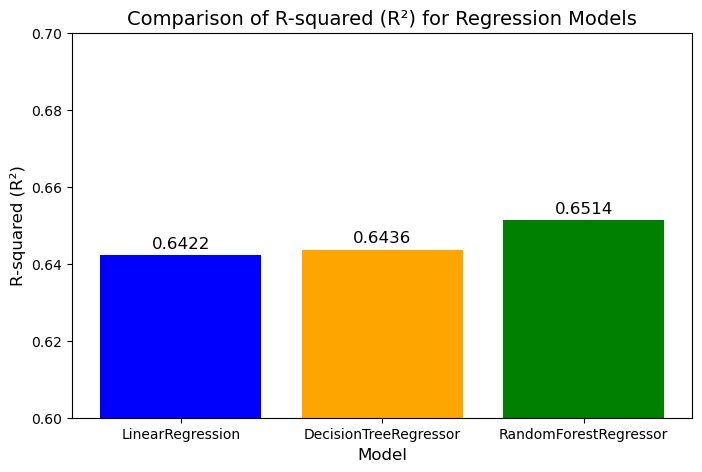

In [17]:
import matplotlib.pyplot as plt

# Model names and R² values
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
r_squared_values = [0.6421614277994421, 0.6436367753401651, 0.6513522834435101]

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r_squared_values, color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Comparison of R-squared (R²) for Regression Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared (R²)', fontsize=12)
plt.ylim(0.6, 0.7)  # Adjust y-axis to make differences more visible

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (R² value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001,  # Position the text slightly above the bar
             round(yval, 4), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()